## Методы уменьшения размерности. Линейный дискриминантный анализ

Дана многомерная выборка $\{\xi_1,...,\xi_h\}$.

$m_i$ -- количество элементов в классе $W_i$ ($\sum_{i=1}^3 m_i = h$)


Разделим объекты выборки на 3 класса: $W_1 = \{\xi_{{W_1}_1},...,\xi_{{W_1}_{m_1}} \}$, 
$W_2 = \{\xi_{{W_2}_1},...,\xi_{{W_2}_{m_1}} \}$, $W_3 = \{\xi_{{W_3}_1},...,\xi_{{W_3}_{m_3}} \}$.

Каждый объект выборки содержит $k$ признаков, то есть $W_i$ можно представить как матрицу $m_i \times k$.

Пусть **локальные** центроиды расположены в точках $\mu_1, \mu_2, \mu_3$. 
    **Глобальная** центроида $-$ $\mu$.

Расстояние между глобальной и локальными центроидами назовем $S_{B_i}$, $i=1..3$

Длину оси каждого класса обозначим как $S_{W_i}$, $i=1..3$

*Вопрос: как можно обозначить иначе $\mu_i$ и $S_{W_i}$?*

<img src="https://images2.russianblogs.com/397/c3/c31656297be7de16dc0969d523b38dfd.JPEG">

Матрицы $S_w$ и $S_b$ $-$ матрицы **внутренней** и **межклассовой** дивергенции.

$S_w = \sum_{i=1}^h (W_i  − \mu_i ) (W_i  − \mu_i)^T$

$S_b = \sum_{i=1}^h m_i ( \mu_i − \mu ) ( \mu_i − \mu )^T$

$S_w^{−1} S_b W = \lambda W$ (где $\lambda$ -- собственные значения матрицы $S_w^{−1} S_b$)

Нам нужно вычислить матрицу $W$ (состоящую из собственных векторов), чтобы минимизировать среднее значение расстояния внутри классов и максимизировать дивергенцию между другими классами.

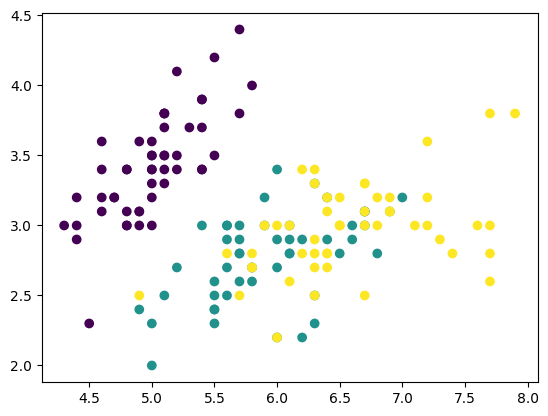

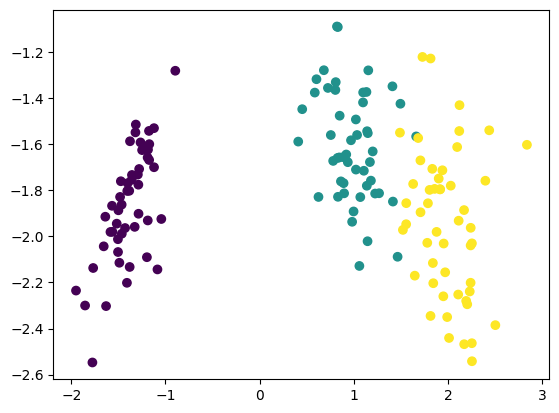

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


def LDA_dimensionality(X, y, k):
    '''
    X - набор данных, y - метка, k - целевой размер
    '''
    label_ = list(set(y))

    X_classify = {}

    for label in label_:
        X1 = np.array([X[i] for i in range(len(X)) if y[i] == label])
        X_classify[label] = X1

    mju = np.mean(X, axis=0)
    mju_classify = {}

    for label in label_:
        mju1 = np.mean(X_classify[label], axis=0)
        mju_classify[label] = mju1

    #St = np.dot((X - mju).T, X - mju)

    Sw = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
    for i in label_:
        Sw += np.dot((X_classify[i] - mju_classify[i]).T,
                     X_classify[i] - mju_classify[i])

    # Sb=St-Sw

    Sb = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
    for i in label_:
        Sb += len(X_classify[i]) * np.dot((mju_classify[i] - mju).reshape(
            (len(mju), 1)), (mju_classify[i] - mju).reshape((1, len(mju))))

    eig_vals, eig_vecs = np.linalg.eig(
        np.linalg.inv(Sw).dot(Sb))  # Вычислить собственное значение и собственную матрицу Sw-1 * Sb

    sorted_indices = np.argsort(eig_vals)
    topk_eig_vecs = eig_vecs[:, sorted_indices[:-k - 1:-1]]  # Извлекаем первые k векторов признаков
    return topk_eig_vecs


if '__main__' == __name__:

    iris = load_iris()
    X = iris.data
    y = iris.target
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
    plt.show()

    W = LDA_dimensionality(X, y, 2)
    X_new = np.dot((X), W)
    plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=y)


    plt.show()

In [7]:
W = LDA_dimensionality(X, y, 2)
W

array([[-0.20874182, -0.00653196],
       [-0.38620369, -0.58661055],
       [ 0.55401172,  0.25256154],
       [ 0.7073504 , -0.76945309]])

In [9]:
np.dot((X), W)

array([[-1.49920971, -1.88675441],
       [-1.2643595 , -1.59214275],
       [-1.35525305, -1.73341462],
       [-1.18495616, -1.62358806],
       [-1.5169559 , -1.94476227],
       [-1.40864014, -2.20148038],
       [-1.28548339, -1.90177269],
       [-1.38431399, -1.80218401],
       [-1.12136823, -1.53021571],
       [-1.31831374, -1.54860234],
       [-1.58367182, -1.98077996],
       [-1.28716445, -1.77562146],
       [-1.31422036, -1.51454424],
       [-1.37605297, -1.58704672],
       [-1.94923317, -2.23514437],
       [-1.77516687, -2.54725756],
       [-1.63024483, -2.302505  ],
       [-1.42847467, -1.96369972],
       [-1.50337736, -2.06783361],
       [-1.48893461, -2.11442674],
       [-1.35700838, -1.75428449],
       [-1.3795792 , -2.13271099],
       [-1.65506386, -2.0431741 ],
       [-1.04356034, -1.92449977],
       [-1.12096094, -1.699853  ],
       [-1.17443134, -1.54228363],
       [-1.18744274, -1.93081847],
       [-1.46468272, -1.86215146],
       [-1.48146353,

In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
label_ = list(set(y))

X_classify = {}

for label in label_:
    X1 = np.array([X[i] for i in range(len(X)) if y[i] == label])
    X_classify[label] = X1

mju = np.mean(X, axis=0)
mju_classify = {}

for label in label_:
    mju1 = np.mean(X_classify[label], axis=0)
    mju_classify[label] = mju1

In [11]:
label_

[0, 1, 2]

In [12]:
X_classify

{0: array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
       

In [13]:
mju_classify

{0: array([5.006, 3.428, 1.462, 0.246]),
 1: array([5.936, 2.77 , 4.26 , 1.326]),
 2: array([6.588, 2.974, 5.552, 2.026])}

In [14]:
Sw = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
for i in label_:
    Sw += np.dot((X_classify[i] - mju_classify[i]).T,
                 X_classify[i] - mju_classify[i])

In [15]:
Sw

array([[38.9562, 13.63  , 24.6246,  5.645 ],
       [13.63  , 16.962 ,  8.1208,  4.8084],
       [24.6246,  8.1208, 27.2226,  6.2718],
       [ 5.645 ,  4.8084,  6.2718,  6.1566]])

In [16]:
Sb = np.zeros((len(mju), len(mju)))  # Вычислить матрицу межклассовой дивергенции
for i in label_:
    Sb += len(X_classify[i]) * np.dot((mju_classify[i] - mju).reshape(
        (len(mju), 1)), (mju_classify[i] - mju).reshape((1, len(mju))))

In [17]:
Sb

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

In [21]:
eig_vals, eig_vecs = np.linalg.eig(
    np.linalg.inv(Sw).dot(Sb))  # Вычислить собственное значение и собственную матрицу Sw-1 * Sb

In [23]:
sorted_indices = np.argsort(eig_vals)

sorted_indices

array([3, 2, 1, 0], dtype=int64)

In [25]:
topk_eig_vecs = eig_vecs[:, sorted_indices[:-2 - 1:-1]]  # Извлекаем первые k векторов признаков

In [26]:
topk_eig_vecs

array([[-0.20874182, -0.00653196],
       [-0.38620369, -0.58661055],
       [ 0.55401172,  0.25256154],
       [ 0.7073504 , -0.76945309]])

In [27]:
eig_vecs

array([[-0.20874182, -0.00653196,  0.70508378, -0.25707624],
       [-0.38620369, -0.58661055, -0.02843695,  0.40666406],
       [ 0.55401172,  0.25256154,  0.03216918,  0.46736652],
       [ 0.7073504 , -0.76945309, -0.70782296, -0.74169043]])

In [10]:
x1 = np.array([4.9, 3. , 1.4, 0.2])

In [12]:
np.dot(x1, W)

array([-1.2643595 , -1.59214275])

<img src="https://scikit-learn.ru/wp-content/uploads/2021/10/image-70.png">